Time Domain MSE: 0.0066944721077466995
Frequency Domain MSE: 3.958713680788985e-05


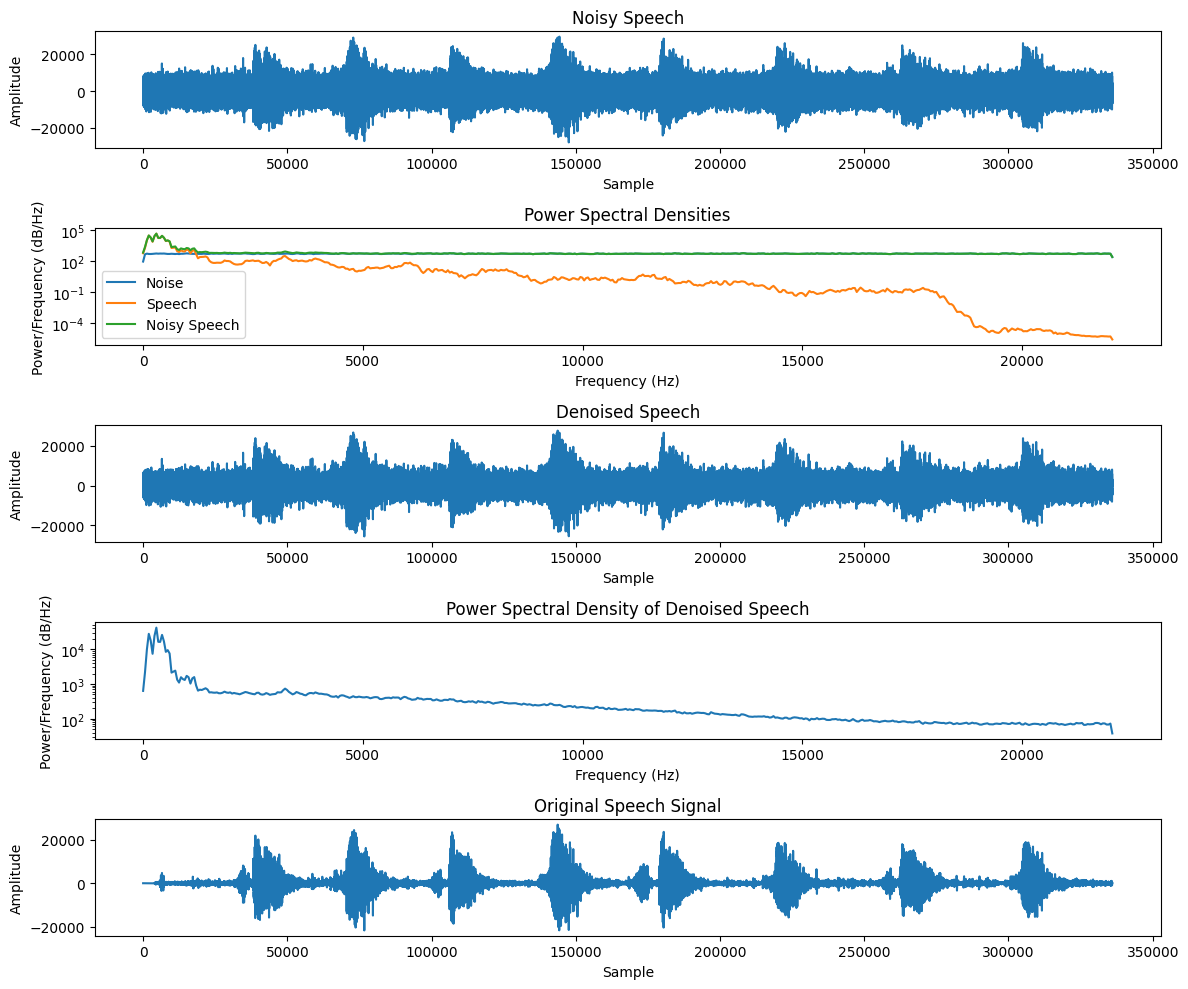

For FFT elapsed time is:
1.0439403057098389


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import welch, wiener
import time
from sklearn.metrics import mean_squared_error

# Record the start time
start_time = time.time()

# Load the recorded speech signal
fs, speech = wavfile.read("mono.wav")

# Generate AWGN
noise_level = 1  # Adjust the noise level as needed
noise = np.random.normal(0, noise_level * np.std(speech), len(speech))

# Combine speech and noise
noisy_signal = speech + noise

# Plot the Noisy Speech
plt.figure(figsize=(12, 10))
plt.subplot(5, 1, 1)
plt.title("Noisy Speech")
plt.plot(noisy_signal)
plt.xlabel("Sample")
plt.ylabel("Amplitude")

# Compute Power Spectral Density (PSD) using Welch method
frequencies, psd_noise = welch(noise, fs=fs, nperseg=1024)
_, psd_speech = welch(speech, fs=fs, nperseg=1024)
_, psd_noisy = welch(noisy_signal, fs=fs, nperseg=1024)

# Plot the PSDs
plt.subplot(5, 1, 2)
plt.title("Power Spectral Densities")
plt.semilogy(frequencies, psd_noise, label="Noise")
plt.semilogy(frequencies, psd_speech, label="Speech")
plt.semilogy(frequencies, psd_noisy, label="Noisy Speech")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power/Frequency (dB/Hz)")
plt.legend()

# Apply Wiener filter to denoise the speech signal
denoised_signal = wiener(noisy_signal)

# Normalize signals
speech_normalized = speech / np.max(np.abs(speech))
denoised_normalized = denoised_signal / np.max(np.abs(denoised_signal))

# Ensure equal length
min_len = min(len(speech_normalized), len(denoised_normalized))
speech_normalized = speech_normalized[:min_len]
denoised_normalized = denoised_normalized[:min_len]

# Calculate time domain Mean Squared Error (MSE)
time_domain_mse = mean_squared_error(speech_normalized, denoised_normalized)

# Plot the Denoised Speech
plt.subplot(5, 1, 3)
plt.title("Denoised Speech")
plt.plot(denoised_signal)
plt.xlabel("Sample")
plt.ylabel("Amplitude")

# Compute Power Spectral Density of Denoised Speech
_, psd_denoised = welch(denoised_signal, fs=fs, nperseg=1024)

# Normalize PSD values and add a small constant to avoid division by zero
psd_speech_normalized = psd_speech / (np.max(psd_speech) + 1e-10)
psd_denoised_normalized = psd_denoised / (np.max(psd_denoised) + 1e-10)

# Calculate frequency domain Mean Squared Error (MSE)
frequency_domain_mse = mean_squared_error(psd_speech_normalized, psd_denoised_normalized)

# Plot the PSD of Denoised Speech
plt.subplot(5, 1, 4)
plt.title("Power Spectral Density of Denoised Speech")
plt.semilogy(frequencies, psd_denoised)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power/Frequency (dB/Hz)")

# Plot the original speech signal for comparison
plt.subplot(5, 1, 5)
plt.title("Original Speech Signal")
plt.plot(speech)
plt.xlabel("Sample")
plt.ylabel("Amplitude")

# Print MSE values
print(f"Time Domain MSE: {time_domain_mse}")
print(f"Frequency Domain MSE: {frequency_domain_mse}")

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

# Record the end time
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"For FFT elapsed time is:")
print(elapsed_time)
